In [1]:
from mlflux.gotm import read
import pandas as pd
from tqdm import tqdm
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 3

In [2]:
import os

def read_monthly (filename_, year, n1, n2, DELETE=False):
    ''' Auguments:
        filename: file name with placeholder for year and month
        n1: number of data points in time
        n2: number of depth points
    '''
    # days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    ds_months = []

    for i,month in enumerate(range(1,13)):
        filename = filename_ %(year,month)
        print(filename)
        start_date = pd.Timestamp(year=year, month=month, day=1)
        ds = read(filename, n1, n2, start_date)
        ds = ds.where(ds.t.dt.month==month, drop=True)
        ds_months.append(ds)
        if DELETE:
            os.remove(filename)
    
    ds_full = xr.concat(ds_months, dim="t")
    return ds_full

In [13]:
from mlflux.utils import save_ds_compressed
folder = '/scratch/jw8736/gotm/ensem/'

MINUTE = 60
n2 = 200 # number of vertical points
n1 = 31 # run for 31 days regardless of months
n1_ = int(n1*24*60/MINUTE) + 1 # depends on output frequency
ylist = [2011,2012,2013,2015,2016] # the years that we ran
ENSEM = np.arange(1,11) # tags for ensembles
method = 'kepsilon' # {'kepsilon', 'kpp'}

for year in ylist:
    for i in ENSEM:
        filename_end = 'dt%g_ensem%g' % (MINUTE, i)
        filename = folder + f'out_{method}_%g_%g_' + filename_end
        ds = read_monthly (filename, year, n1_, n2, DELETE=False)
        netcdf_name = folder + f'out_{method}_%g_dt%g_ensem%g.nc' %(year, MINUTE,i)
        save_ds_compressed(ds, netcdf_name)

/scratch/jw8736/gotm/ensem/out_kepsilon_2011_1_dt60_ensem1
/scratch/jw8736/gotm/ensem/out_kepsilon_2011_2_dt60_ensem1
/scratch/jw8736/gotm/ensem/out_kepsilon_2011_3_dt60_ensem1
/scratch/jw8736/gotm/ensem/out_kepsilon_2011_4_dt60_ensem1
/scratch/jw8736/gotm/ensem/out_kepsilon_2011_5_dt60_ensem1
/scratch/jw8736/gotm/ensem/out_kepsilon_2011_6_dt60_ensem1
/scratch/jw8736/gotm/ensem/out_kepsilon_2011_7_dt60_ensem1
/scratch/jw8736/gotm/ensem/out_kepsilon_2011_8_dt60_ensem1
/scratch/jw8736/gotm/ensem/out_kepsilon_2011_9_dt60_ensem1
/scratch/jw8736/gotm/ensem/out_kepsilon_2011_10_dt60_ensem1
/scratch/jw8736/gotm/ensem/out_kepsilon_2011_11_dt60_ensem1
/scratch/jw8736/gotm/ensem/out_kepsilon_2011_12_dt60_ensem1
/scratch/jw8736/gotm/ensem/out_kepsilon_2011_1_dt60_ensem2
/scratch/jw8736/gotm/ensem/out_kepsilon_2011_2_dt60_ensem2
/scratch/jw8736/gotm/ensem/out_kepsilon_2011_3_dt60_ensem2
/scratch/jw8736/gotm/ensem/out_kepsilon_2011_4_dt60_ensem2
/scratch/jw8736/gotm/ensem/out_kepsilon_2011_5_dt60_e

In [13]:
from mlflux.utils import save_ds_compressed
folder = '/scratch/jw8736/gotm/ensem/'

MINUTE = 60
n2 = 200 # number of vertical points
n1 = 31 # run for 31 days regardless of months
n1_ = int(n1*24*60/MINUTE) + 1 # depends on output frequency
ylist = [2011,2012,2013,2015,2016] # the years that we ran
ENSEM = np.arange(1,11) # tags for ensembles
method = 'kpp' # {'kepsilon', 'kpp'}

####### Deterministic cases ##########
for year in ylist:
    f_end = 'dt%g' % MINUTE
    f_starts = ['out_bulk_','out_ann_mean_','out_ensem_mean_']
    for f_start in f_starts:
        filename = folder + f_start + f'{method}_%g_%g_' + f_end
        ds = read_monthly (filename, year, n1_, n2, DELETE=False)
        netcdf_name = folder + f_start + f'{method}_%g_dt%g.nc' %(year, MINUTE)
        save_ds_compressed(ds, netcdf_name)       

/scratch/jw8736/gotm/ensem/out_bulk_kpp_2011_1_dt60
/scratch/jw8736/gotm/ensem/out_bulk_kpp_2011_2_dt60
/scratch/jw8736/gotm/ensem/out_bulk_kpp_2011_3_dt60
/scratch/jw8736/gotm/ensem/out_bulk_kpp_2011_4_dt60
/scratch/jw8736/gotm/ensem/out_bulk_kpp_2011_5_dt60
/scratch/jw8736/gotm/ensem/out_bulk_kpp_2011_6_dt60
/scratch/jw8736/gotm/ensem/out_bulk_kpp_2011_7_dt60
/scratch/jw8736/gotm/ensem/out_bulk_kpp_2011_8_dt60
/scratch/jw8736/gotm/ensem/out_bulk_kpp_2011_9_dt60
/scratch/jw8736/gotm/ensem/out_bulk_kpp_2011_10_dt60
/scratch/jw8736/gotm/ensem/out_bulk_kpp_2011_11_dt60
/scratch/jw8736/gotm/ensem/out_bulk_kpp_2011_12_dt60
/scratch/jw8736/gotm/ensem/out_ann_mean_kpp_2011_1_dt60
/scratch/jw8736/gotm/ensem/out_ann_mean_kpp_2011_2_dt60
/scratch/jw8736/gotm/ensem/out_ann_mean_kpp_2011_3_dt60
/scratch/jw8736/gotm/ensem/out_ann_mean_kpp_2011_4_dt60
/scratch/jw8736/gotm/ensem/out_ann_mean_kpp_2011_5_dt60
/scratch/jw8736/gotm/ensem/out_ann_mean_kpp_2011_6_dt60
/scratch/jw8736/gotm/ensem/out_ann_me

In [13]:
folder = '/scratch/jw8736/gotm/ensem/'
ds = xr.open_mfdataset(folder+'out_kpp_2013_dt60_ensem*.nc', combine='nested', concat_dim='ensem')

In [14]:
ds

<xarray.Dataset>
Dimensions:  (ensem: 10, t: 8760, z: 200)
Coordinates:
  * t        (t) datetime64[ns] 2013-01-01 ... 2013-12-31T23:00:00
  * z        (z) float64 -199.5 -198.5 -197.5 -196.5 ... -3.5 -2.5 -1.5 -0.5
Dimensions without coordinates: ensem
Data variables:
    ux       (ensem, t, z) float32 dask.array<chunksize=(1, 8760, 200), meta=np.ndarray>
    uy       (ensem, t, z) float32 dask.array<chunksize=(1, 8760, 200), meta=np.ndarray>
    T        (ensem, t, z) float32 dask.array<chunksize=(1, 8760, 200), meta=np.ndarray>
    S        (ensem, t, z) float32 dask.array<chunksize=(1, 8760, 200), meta=np.ndarray>
    swr      (ensem, t, z) float32 dask.array<chunksize=(1, 8760, 200), meta=np.ndarray>
    nn       (ensem, t, z) float32 dask.array<chunksize=(1, 8760, 200), meta=np.ndarray>
    nu       (ensem, t, z) float32 dask.array<chunksize=(1, 8760, 200), meta=np.ndarray>
    taux     (ensem, t) float32 dask.array<chunksize=(1, 8760), meta=np.ndarray>
    tauy     (ensem, t) float32 dask.array<chunksize=(1, 8760), meta=np.ndarray>
    Q        (ensem, t) float32 dask.array<chunksize=(1, 8760), meta=np.ndarray>

(0.0, 20.0)

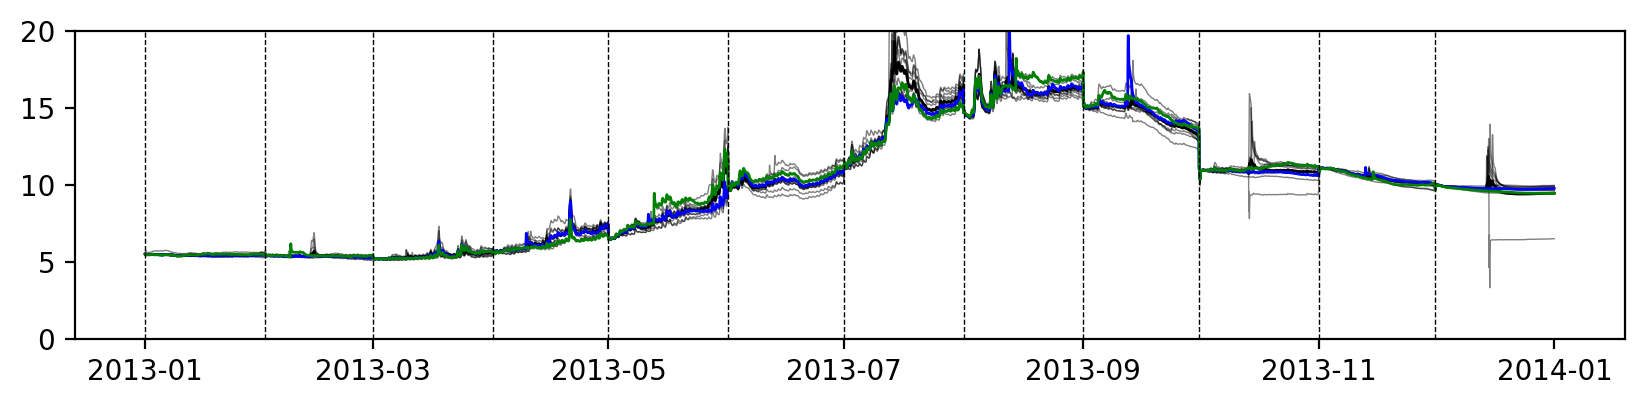

In [25]:
fig = plt.figure(figsize=[10,2], dpi=200)
folder = '/scratch/jw8736/gotm/ensem/'
method = 'kepsilon'

ds = xr.open_mfdataset(folder+f'out_{method}_2013_dt60_ensem*.nc', combine='nested', concat_dim='ensem')

for i in range(0,10):
    plt.plot(ds.isel(ensem=i).t, ds.isel(ensem=i).T.isel(z=-1), c='k', lw=0.5, alpha=0.5)

plt.plot(ds.t, ds.T.mean(dim='ensem').isel(z=-1), c='k', lw=1, alpha=1, label='ANN ensem mean')

ds = xr.open_dataset(folder+f'out_ensem_mean_{method}_2013_dt60.nc')
plt.plot(ds.t, ds.T.isel(z=-1), c='b', lw=1, alpha=1, label='ANN deterministic')

ds = xr.open_dataset(folder+f'out_bulk_{method}_2013_dt60.nc')
plt.plot(ds.t, ds.T.isel(z=-1), c='g', lw=1, alpha=1, label='Bulk')

for i in range(1,13):
    plt.axvline(x=pd.Timestamp(2013,i,1), ls='--', lw=0.5, c='k')

plt.ylim([0,20])
# plt.xlim([80,190])

(0.0, 20.0)

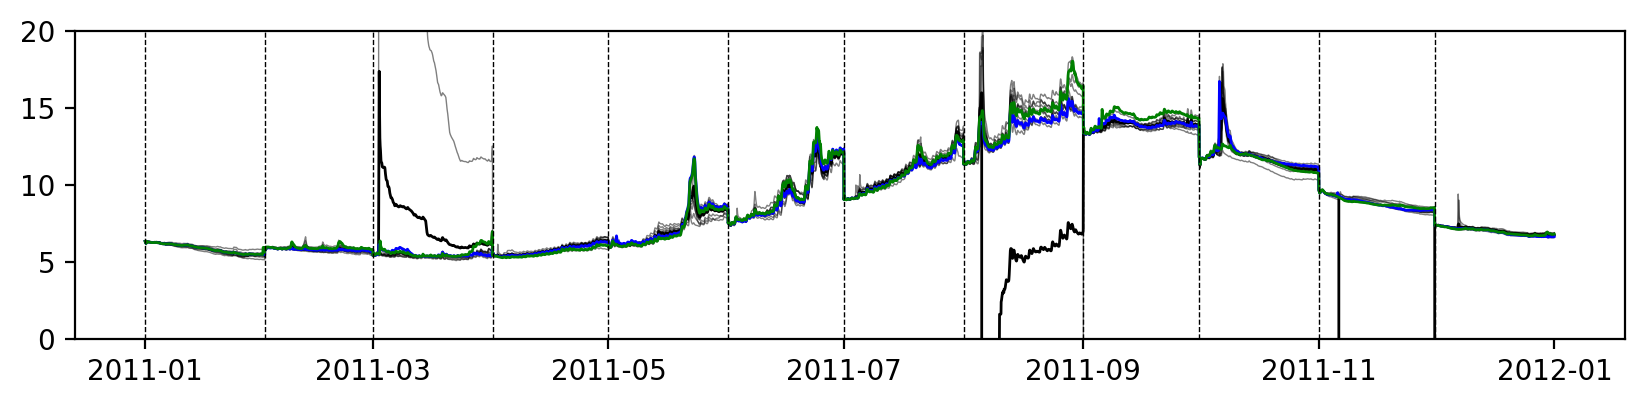

In [27]:
fig = plt.figure(figsize=[10,2], dpi=200)
folder = '/scratch/jw8736/gotm/ensem/'
method = 'kepsilon'
year = 2011

ds = xr.open_mfdataset(folder+f'out_{method}_{year}_dt60_ensem*.nc', combine='nested', concat_dim='ensem')

for i in range(0,10):
    plt.plot(ds.isel(ensem=i).t, ds.isel(ensem=i).T.isel(z=-1), c='k', lw=0.5, alpha=0.5)

plt.plot(ds.t, ds.T.mean(dim='ensem').isel(z=-1), c='k', lw=1, alpha=1, label='ANN ensem mean')

ds = xr.open_dataset(folder+f'out_ensem_mean_{method}_{year}_dt60.nc')
plt.plot(ds.t, ds.T.isel(z=-1), c='b', lw=1, alpha=1, label='ANN deterministic')

ds = xr.open_dataset(folder+f'out_bulk_{method}_{year}_dt60.nc')
plt.plot(ds.t, ds.T.isel(z=-1), c='g', lw=1, alpha=1, label='Bulk')

for i in range(1,13):
    plt.axvline(x=pd.Timestamp(year,i,1), ls='--', lw=0.5, c='k')

plt.ylim([0,20])
# plt.xlim([80,190])

Text(0.5, 1.0, 'kepsilon-2013')

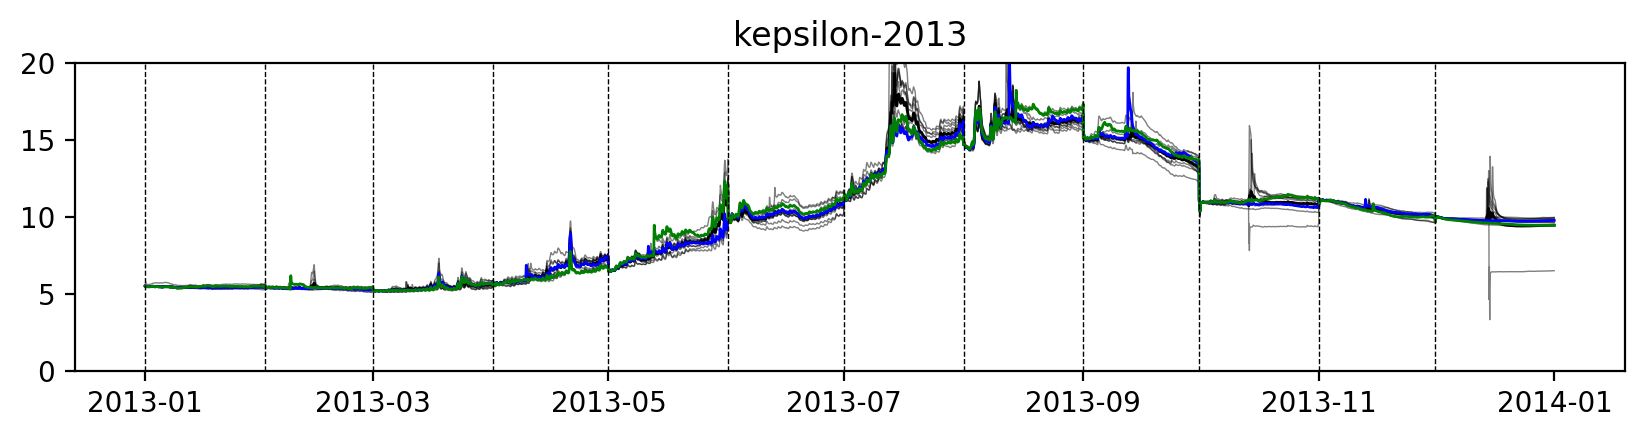

In [38]:
fig = plt.figure(figsize=[10,2], dpi=200)
folder = '/scratch/jw8736/gotm/ensem/'
method = 'kepsilon'
year = 2013

ds = xr.open_mfdataset(folder+f'out_{method}_{year}_dt60_ensem*.nc', combine='nested', concat_dim='ensem')

for i in range(0,10):
    plt.plot(ds.isel(ensem=i).t, ds.isel(ensem=i).T.isel(z=-1), c='k', lw=0.5, alpha=0.5)

plt.plot(ds.t, ds.T.mean(dim='ensem').isel(z=-1), c='k', lw=1, alpha=1, label='ANN ensem mean')

ds = xr.open_dataset(folder+f'out_ensem_mean_{method}_{year}_dt60.nc')
plt.plot(ds.t, ds.T.isel(z=-1), c='b', lw=1, alpha=1, label='ANN deterministic')

ds = xr.open_dataset(folder+f'out_bulk_{method}_{year}_dt60.nc')
plt.plot(ds.t, ds.T.isel(z=-1), c='g', lw=1, alpha=1, label='Bulk')

for i in range(1,13):
    plt.axvline(x=pd.Timestamp(year,i,1), ls='--', lw=0.5, c='k')

plt.ylim([0,20])
plt.title(f'{method}-{year}')

In [ ]:
fig = plt.figure(figsize=[10,2], dpi=200)
for i in range(0,10):
    plt.plot(ds.isel(ensem=i).t, ds.isel(ensem=i).T.isel(z=-1), c='k', lw=0.5, alpha=0.5)

plt.plot(ds.t, ds.T.mean(dim='ensem').isel(z=-1), c='k', lw=1, alpha=1, label='ANN ensem mean')

ds = xr.open_dataset(folder+'out_ann_mean_kpp_2013_dt60.nc')
plt.plot(ds.t, ds.T.isel(z=-1), c='b', lw=1, alpha=1, label='ANN deterministic')

ds = xr.open_dataset(folder+'out_bulk_kpp_2013_dt60.nc')
plt.plot(ds.t, ds.T.isel(z=-1), c='g', lw=1, alpha=1, label='Bulk')

for i in range(1,13):
    plt.axvline(x=pd.Timestamp(2013,i,1), ls='--', lw=0.5, c='k')

plt.ylim([0,20])
# plt.xlim([80,190])

In [34]:
folder = '/home/jw8736/test-gotm/ensem/2012-01-01_2020-01-01/'
MINUTE = 60; ENSEM = 2

n2 = 200 # number of vertical points
n1 = 31 # run for 31 days regardless of months
n1_ = int(n1*24*60/MINUTE) + 1 # depends on output frequency
filename_end = 'dt%g_ensem%g' % (MINUTE, ENSEM)
filename = folder + 'out_ke_%g_%g_' + filename_end

# days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
ds_months = []
year = 2013
for i,month in enumerate(range(1,13)):
    filename_ = filename %(year,month)
    # print(filename)
    start_date = pd.Timestamp(year=year, month=month, day=1)
    ds = read(filename_, n1_, n2, start_date)
    ds = ds.where(ds.t.dt.month==month, drop=True)
    ds_months.append(ds)

# ds_full = xr.concat(ds_months, dim="t")


### Checking state variable gap

In [4]:
# Path
from mlflux.gotm import read2010
path = '/home/jw8736/code-5.2.1/cases/ows_papa/'
df = read2010(path, datetimeformat='%Y-%m-%d %H:%M:%S')
df_ = df.set_index('datetime')
ds = xr.Dataset.from_dataframe(df_)

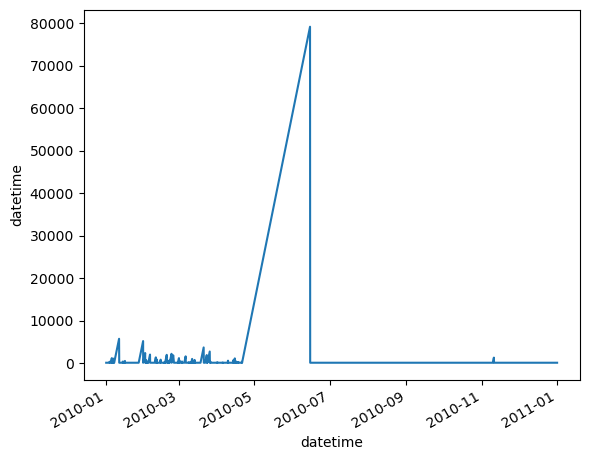

In [23]:
dt = ds.datetime.diff(dim='datetime')/6e10
# dt.sel(datetime=slice('2010-01-01','2010-12-31')).plot() # Big gap between May and June
# dt.sel(datetime=slice('2011-01-01','2011-12-31')).plot() # One data point that has 180 minutes step
# dt.sel(datetime=slice('2012-01-01','2012-12-31')).plot() # Some data points that has between 60 to 420 minutes step
# dt.sel(datetime=slice('2013-01-01','2013-12-31')).plot() # Some data points that has between 60 to 420 minutes step
# dt.sel(datetime=slice('2014-01-01','2014-12-31')).plot() # Has really big blank in first half of the year
# dt.sel(datetime=slice('2015-01-01','2015-12-31')).plot() # 60 to 360 minutes gap
# dt.sel(datetime=slice('2016-01-01','2016-12-31')).plot() # 60 to 360 minutes gap
# dt.sel(datetime=slice('2017-01-01','2017-12-31')).plot() # One really big gap in June
# dt.sel(datetime=slice('2018-01-01','2018-12-31')).plot() # One 600 minutes gap in July
# dt.sel(datetime=slice('2019-01-01','2019-12-31')).plot() # One 1400+ minutes gap in March
dt.sel(datetime=slice('2020-01-01','2020-12-31')).plot() # One really big gap from March to August